In [139]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [140]:
tit_df=pd.read_csv("titanic-training-data.csv")

In [141]:
tit_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S


In [142]:
tit_df.shape

(891, 12)

In [143]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

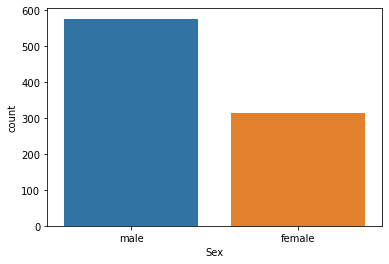

In [145]:
sns.countplot(x="Sex",data=tit_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

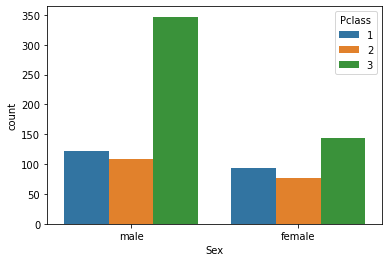

In [146]:
sns.countplot(x="Sex",hue="Pclass",data=tit_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

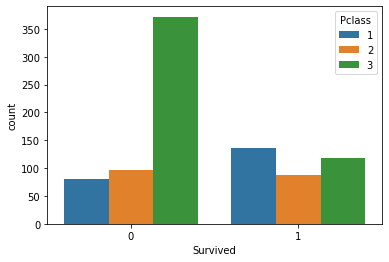

In [147]:
sns.countplot(x="Survived",hue="Pclass",data=tit_df)

<AxesSubplot:xlabel='Age', ylabel='count'>

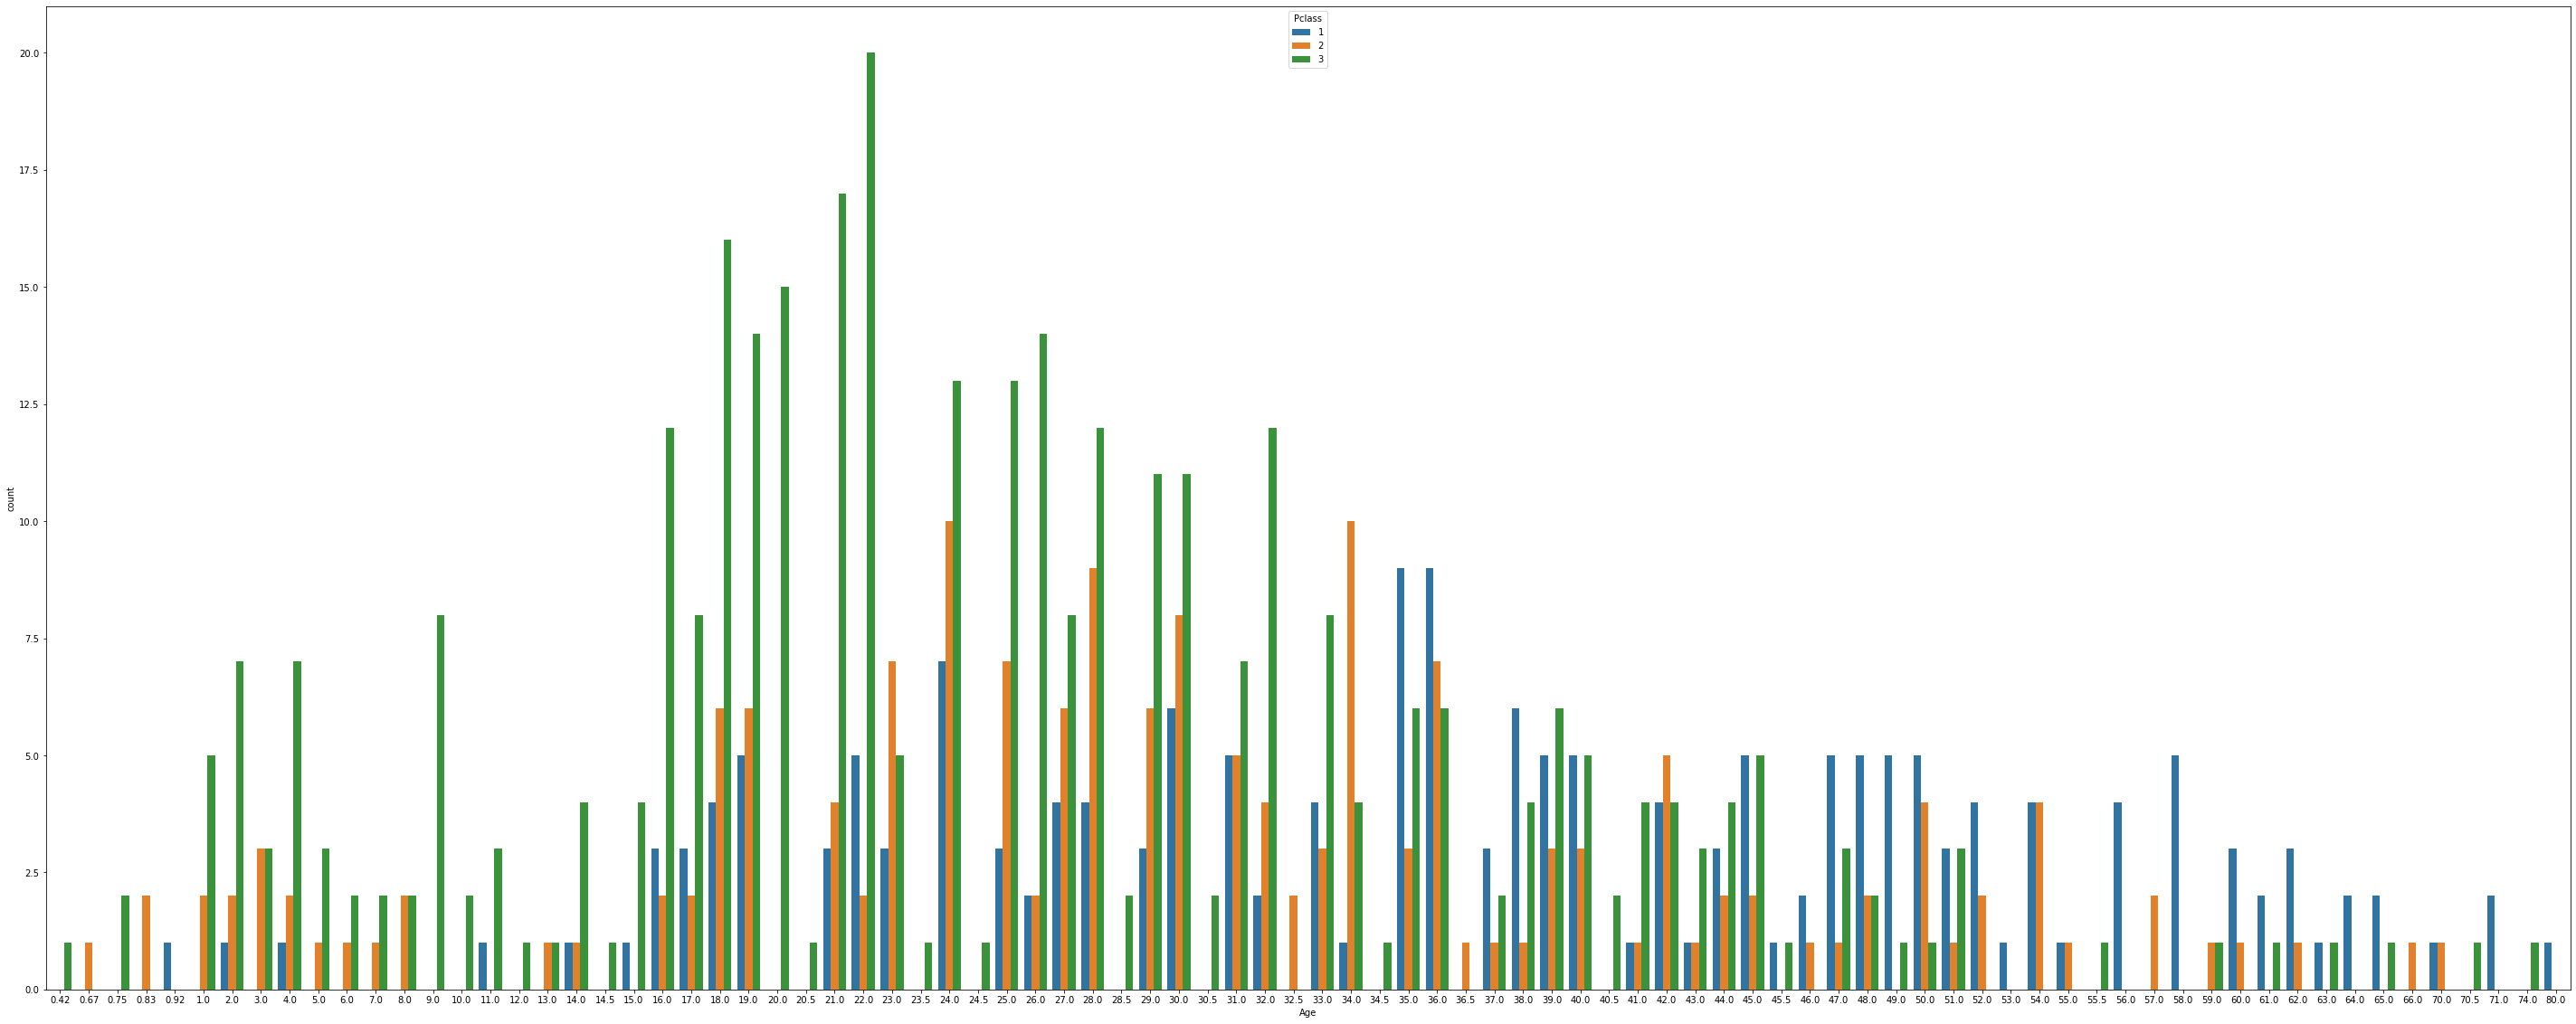

In [148]:
fig, ax = plt.subplots(figsize=(50, 20))
sns.countplot(x="Age",hue="Pclass",data=tit_df)

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

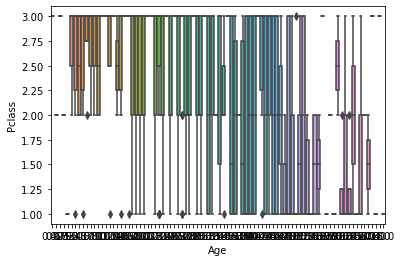

In [149]:
sns.boxplot(x="Age",y="Pclass", data=tit_df)

In [150]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
mean1=tit_df["Age"].mean()
mean1

29.69911764705882

In [153]:
tit_df["Age"].replace(np.nan,mean1,inplace=True)

In [154]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
tit_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [156]:
tit_df.drop("Name",axis=1,inplace=True)

In [157]:
tit_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

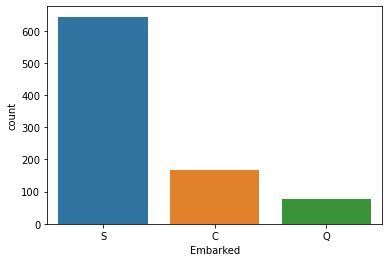

In [158]:
sns.countplot(x="Embarked",data=tit_df)

In [159]:
tit_df["Embarked"]=tit_df["Embarked"].replace({"S":"america","C":"europe","Q":"asia"})
tit_df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
345,346,1,2,female,24.000000,0,0,248733,13.0000,F33,america
743,744,0,3,male,24.000000,1,0,376566,16.1000,NaN,america
97,98,1,1,male,23.000000,0,1,PC 17759,63.3583,D10 D12,europe
875,876,1,3,female,15.000000,0,0,2667,7.2250,NaN,europe
353,354,0,3,male,25.000000,1,0,349237,17.8000,NaN,america
838,839,1,3,male,32.000000,0,0,1601,56.4958,NaN,america
829,830,1,1,female,62.000000,0,0,113572,80.0000,B28,NaN
252,253,0,1,male,62.000000,0,0,113514,26.5500,C87,america
502,503,0,3,female,29.699118,0,0,330909,7.6292,NaN,asia
75,76,0,3,male,25.000000,0,0,348123,7.6500,F G73,america


In [160]:
tit_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [161]:
tit_df=pd.get_dummies(tit_df,columns=["Embarked"])
tit_df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_america,Embarked_asia,Embarked_europe
403,404,0,3,male,28.000000,1,0,STON/O2. 3101279,15.8500,NaN,1,0,0
504,505,1,1,female,16.000000,0,0,110152,86.5000,B79,1,0,0
537,538,1,1,female,30.000000,0,0,PC 17761,106.4250,NaN,0,0,1
311,312,1,1,female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,0,0,1
394,395,1,3,female,24.000000,0,2,PP 9549,16.7000,G6,1,0,0
92,93,0,1,male,46.000000,1,0,W.E.P. 5734,61.1750,E31,1,0,0
502,503,0,3,female,29.699118,0,0,330909,7.6292,NaN,0,1,0
187,188,1,1,male,45.000000,0,0,111428,26.5500,NaN,1,0,0
738,739,0,3,male,29.699118,0,0,349201,7.8958,NaN,1,0,0
600,601,1,2,female,24.000000,2,1,243847,27.0000,NaN,1,0,0


In [162]:
tit_df.drop("Cabin",axis=1,inplace=True)

In [163]:
tit_df.drop("Ticket",axis=1,inplace=True)

In [164]:
tit_df.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Embarked_america      uint8
Embarked_asia         uint8
Embarked_europe       uint8
dtype: object

In [165]:
tit_df["Sex"]=tit_df["Sex"].replace({"male":"1","female":"0"})
tit_df=pd.get_dummies(tit_df,columns=["Sex"])


In [166]:
X=tit_df.drop(["Survived"],axis=1)
Y=tit_df[["Survived"]]

In [167]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.30)

In [168]:
tit_df.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Embarked_america      uint8
Embarked_asia         uint8
Embarked_europe       uint8
Sex_0                 uint8
Sex_1                 uint8
dtype: object

In [169]:
model_1=LogisticRegression()
model_1.fit(X_train,Y_train)

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
model_1.score(X_test,Y_test)

0.8097014925373134

In [171]:
model_1.score(X_train,Y_train)

0.7929373996789727

In [172]:
predictions=model_1.predict(X_test)

In [173]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [187]:
accuracy_score(Y_test,predictions)

0.8097014925373134

In [189]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,10])
tit_df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]]),
columns=[i for i in ["predict 1","predict 0"]]
plt.figure(figsize=(7,5))
sns.heatmap(tit_df_cm,annot=True,fmt='g')

ValueError: Must pass 2-d input. shape=(1, 2, 2)

<Figure size 504x360 with 0 Axes>

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
model_2=DecisionTreeClassifier(max_depth=4,criterion="entropy")

In [217]:
model_2_opt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [218]:
model_2_opt.score(X_train,Y_train)

0.8378812199036918

In [219]:
model_2_opt.score(X_test,Y_test)

0.8171641791044776

In [222]:
pred_dt=mode1_2_opt.predict(X_test)

NameError: name 'mode1_2_opt' is not defined

In [223]:
from sklearn.ensemble import BaggingClassifier

In [236]:
model_3=BaggingClassifier(n_estimators=20,base_estimator=model_2_opt)

In [237]:
model_3.fit(X_train,Y_train)

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=20)

In [238]:
model_3.score(X_train,Y_train)

0.8346709470304976

In [239]:
model_3.score(X_test,Y_test)

0.8171641791044776

In [240]:
from sklearn.ensemble import AdaBoostClassifier

In [241]:
model_4=AdaBoostClassifier()

In [242]:
model_4.fit(X_train,Y_train)

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [243]:
model_4.score(X_train,Y_train)

0.8443017656500803

In [244]:
model_4.score(X_test,Y_test)

0.7910447761194029

In [245]:
from sklearn.ensemble import GradientBoostingClassifier

In [250]:
model_5=GradientBoostingClassifier(n_estimators=10)

In [251]:
model_5.fit(X_train,Y_train)

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=10)

In [252]:
model_5.score(X_train,Y_train)

0.8330658105939005

In [253]:
model_5.score(X_test,Y_test)

0.8208955223880597

In [254]:
from sklearn.ensemble import RandomForestClassifier

In [277]:
model_6=GradientBoostingClassifier(max_features=10,n_estimators=10)

In [278]:
model_6.fit(X_train,Y_train)

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_features=10, n_estimators=10)

In [279]:
model_6.score(X_train,Y_train)

0.8330658105939005

In [280]:
model_6.score(X_test,Y_test)

0.8208955223880597

In [281]:
from sklearn.neighbors import KNeighborsClassifier

In [336]:
model_7=KNeighborsClassifier(n_neighbors=10,p=1,leaf_size=9)

In [337]:
model_7.fit(X_train,Y_train)

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=9, n_neighbors=10, p=1)

In [338]:
model_7.score(X_train,Y_train)

0.7046548956661316

In [339]:
model_7.score(X_test,Y_test)

0.6828358208955224